In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr,spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,confusion_matrix,classification_report

In [ ]:
df=pd.read_csv("/content/heart.csv")
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1        0      150      0      2.3      0   0     1       1
1   37    1   2       130   250    0        1      187      0      3.5      0   0     2       1
2   41    0   1       130   204    0        0      172      0      1.4      2   0     2       1
3   56    1   1       120   236    0        1      178      0      0.8      2   0     2       1
4   57    0   0       120   354    0        1      163      1      0.6      2   0     2       1


In [ ]:
#Simple Correlation
corr_matrix=df.corr()
print("Correlation Matrix: ",corr_matrix)
corr_coeff=df['age'].corr(df['chol'])
print("Correlation coefficent: ",corr_coeff)

Correlation Matrix:                 age       sex        cp  trestbps  ...     slope        ca      thal    target
age       1.000000 -0.098447 -0.068653  0.279351  ... -0.168814  0.276326  0.068001 -0.225439
sex      -0.098447  1.000000 -0.049353 -0.056769  ... -0.030711  0.118261  0.210041 -0.280937
cp       -0.068653 -0.049353  1.000000  0.047608  ...  0.119717 -0.181053 -0.161736  0.433798
trestbps  0.279351 -0.056769  0.047608  1.000000  ... -0.121475  0.101389  0.062210 -0.144931
chol      0.213678 -0.197912 -0.076904  0.123174  ... -0.004038  0.070511  0.098803 -0.085239
fbs       0.121308  0.045032  0.094444  0.177531  ... -0.059894  0.137979 -0.032019 -0.028046
restecg  -0.116211 -0.058196  0.044421 -0.114103  ...  0.093045 -0.072042 -0.011981  0.137230
thalach  -0.398522 -0.044020  0.295762 -0.046698  ...  0.386784 -0.213177 -0.096439  0.421741
exang     0.096801  0.141664 -0.394280  0.067616  ... -0.257748  0.115739  0.206754 -0.436757
oldpeak   0.210013  0.096093 -0.149230 

In [ ]:
#Partial Correlation
def partial_corr(df,X,y,covar):
  corr_matrix=df[[X,y,covar]].corr()
  r_xy=corr_matrix.iloc[0,1]
  r_xcovar=corr_matrix.iloc[0,2]
  r_ycovar=corr_matrix.iloc[1,2]
  r_covar=corr_matrix.iloc[2,2]
  partial_corr_value=(r_xy-(r_xcovar*r_ycovar)/(1-r_xcovar**2)*(1-r_ycovar**2))
  return partial_corr_value
result=partial_corr(df,X='age',y='fbs',covar='chol')
print("Partial Correlation: ",result)

Partial Correlation:  0.11833172480405849


In [ ]:
#Multiple Correlation
y='sex'
x1='age'
x2='cp'
x3='chol'
df_corr=df[[y,x1,x2,x3]].corr()
r=(1-(1/df_corr.iloc[0,0]**2)*(1-df_corr.iloc[0,1]**2)*(1-df_corr.iloc[0,2]**2)*(1-df_corr.iloc[0,3]**2))
print("Multiple Correlation coefficient: ",r)

Multiple Correlation coefficient:  0.05079896447344523


In [ ]:
#Pearson Correlation
x=df["age"]
y=df["chol"]
corr,p_value=pearsonr(x,y)
print(f"Pearson correlation coefficent: {corr}")
print(f"P-value: {p_value}")
#Spearman Correlation
corr,p_value=spearmanr(x,y)
print(f"Spearman correlation coefficient: {corr}")
print(f"p-value: {p_value}")

Pearson correlation coefficent: 0.2136779565595619
P-value: 0.00017862864341448777
Spearman correlation coefficient: 0.19578599445342354
p-value: 0.000609914322285383


Intercept: 102.29610118508204
Slope: 0.5394452340751621


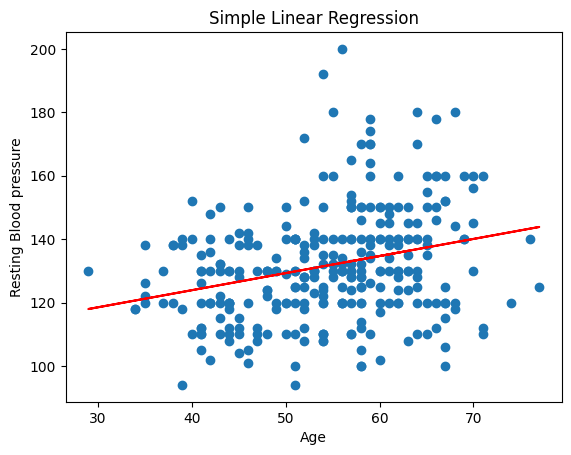

In [ ]:
#Simple Linear regression
X=df[["age"]]
y=df["trestbps"]
model=LinearRegression()
model.fit(X,y)
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_[0]}")
y_pred=model.predict(X)
plt.scatter(X,y)
plt.plot(X,y_pred,color="red")
plt.xlabel('Age')
plt.ylabel("Resting Blood pressure")
plt.title("Simple Linear Regression")
plt.show()

Mean square erroe: 0.12391847042217871
R2 Score: 0.5031243228007252
age:-0.0040447775017301395
sex:-0.27179144950772716
cp:0.13351677397564615
trestbps:-0.0032684420541957138
chol:-0.0005892725795676457
fbs:-0.001633263018289923
restecg:0.053427197118709094
thalach:0.0048107813734869775
exang:-0.1966250269740777


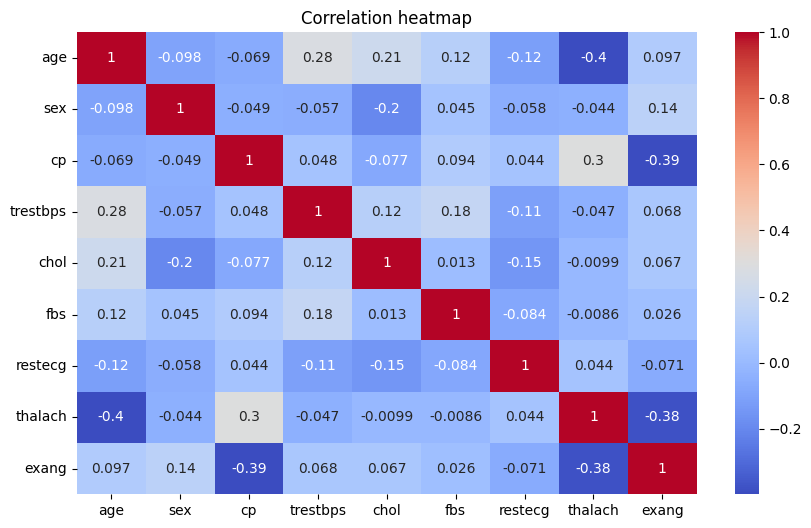

In [ ]:
#Multiple Linear Regression
X=df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang']]
y=df["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X,y)
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean square erroe: {mse}")
print(f"R2 Score: {r2}")
for i,col in enumerate(X.columns):
  print(f"{col}:{model.coef_[i]}")
plt.figure(figsize=[10,6])
sns.heatmap(X.corr(),annot=True,cmap='coolwarm')
plt.title("Correlation heatmap")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.819672131147541
Classification report:                precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61

Confusion matrix:  [[26  3]
 [ 8 24]]


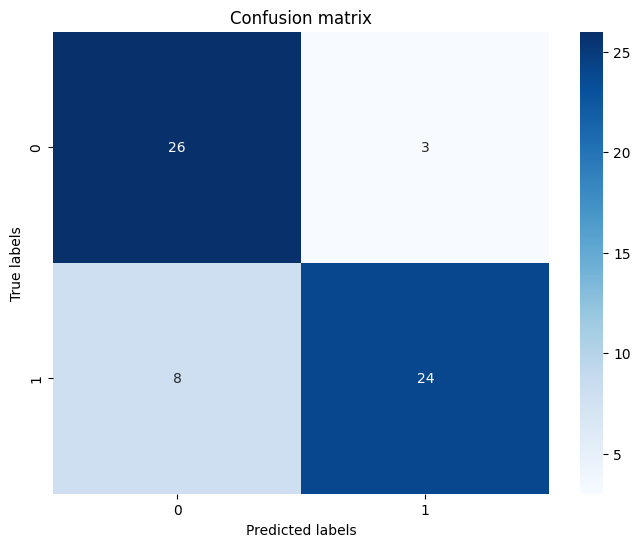

In [ ]:
#Logistic Regression
X=df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang']]
y=df["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(X,y)
y_pred=model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Classification report: ",classification_report(y_test,y_pred))
print("Confusion matrix: ",confusion_matrix(y_test,y_pred))
plt.figure(figsize=[8,6])
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion matrix")
plt.show()